In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from IPython.display import display

In [2]:
def mix_norm_dist(N):
    x_mean1 = 0
    y_mean1 = 0
    std_x1 = 1
    std_y1 = 1
    x_mean2 = 0
    y_mean2 = 0
    std_x2 = 10
    std_y2 = 10
    ro1 = 0.9
    ro2 = -0.9
    cov1 = [[std_x1**2, std_x1*std_y1*ro1], [std_x1*std_y1*ro1, std_y1**2]]
    cov2 = [[std_x2**2, std_x2*std_y2*ro2], [std_x2*std_y2*ro2, std_y2**2]]
    
    return 0.9 * st.multivariate_normal.rvs(mean=[x_mean1, y_mean1], cov=cov1, size=N) + 0.1 * st.multivariate_normal.rvs(mean=[x_mean2, y_mean2], cov=cov2, size=N)

def norm_dist(ro_e, N):
    x_mean = 0
    y_mean = 0
    std_x = 1
    std_y = 1
    cov = [[std_x**2, std_x*std_y*ro_e], [std_x*std_y*ro_e, std_y**2]]
    
    return st.multivariate_normal.rvs(mean=[x_mean, y_mean], cov=cov, size=N)

def E(z):
    return np.mean(z)

def E_2(z):
    return E(np.power(z, 2))

def D(z):
    return np.var(z)

def pearsonr(X, Y):
    return st.pearsonr(X, Y)[0]

def spearmanr(X, Y):
    return st.spearmanr(X, Y)[0]

def quadrant(X, Y):
    s = 0
    
    for i in range(len(X)):
        s += np.sign(X[i] - np.median(X)) * np.sign(Y[i] - np.median(Y))
        
    return s / len(X)

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:, order]

def custom_copy(arr, col):
    a = np.array([])
    
    for el in arr:
        a = np.append(a, el[col])
        
    return a

def discard(a, n):
    return ('{0:.' + str(n) + 'f}').format(a).rstrip('0').rstrip('.')

REPEATS = 1000
MIXTURE = 228
correlation = [0, 0.5, 0.9, MIXTURE]
power = [20, 60, 100, 2, 3]
np.random.seed(0)

r=0


n=20,Pearson,Spearman,quadrant
E(z),0.012,0.011,0.003
E(z^2),0.048,0.05,0.051
D(z),0.048,0.049,0.051


n=60,Pearson,Spearman,quadrant
E(z),0.004,0.004,0.003
E(z^2),0.016,0.017,0.017
D(z),0.016,0.017,0.017


n=100,Pearson,Spearman,quadrant
E(z),0.001,0.001,-0.001
E(z^2),0.01,0.01,0.011
D(z),0.01,0.01,0.011


r=0.5


n=20,Pearson,Spearman,quadrant
E(z),0.489,0.46,0.322
E(z^2),0.271,0.246,0.148
D(z),0.032,0.035,0.044


n=60,Pearson,Spearman,quadrant
E(z),0.496,0.476,0.331
E(z^2),0.255,0.237,0.124
D(z),0.009,0.01,0.014


n=100,Pearson,Spearman,quadrant
E(z),0.497,0.477,0.331
E(z^2),0.253,0.233,0.118
D(z),0.005,0.006,0.009


r=0.9


n=20,Pearson,Spearman,quadrant
E(z),0.896,0.867,0.696
E(z^2),0.806,0.756,0.513
D(z),0.002,0.004,0.029


n=60,Pearson,Spearman,quadrant
E(z),0.898,0.883,0.707
E(z^2),0.808,0.78,0.508
D(z),0.001,0.001,0.009


n=100,Pearson,Spearman,quadrant
E(z),0.899,0.886,0.708
E(z^2),0.809,0.786,0.507
D(z),0,0.001,0.005


mixture


n=20,Pearson,Spearman,quadrant
E(z),-0.08,-0.078,-0.05
E(z^2),0.061,0.061,0.056
D(z),0.054,0.055,0.054


n=60,Pearson,Spearman,quadrant
E(z),-0.092,-0.086,-0.06
E(z^2),0.025,0.024,0.021
D(z),0.016,0.016,0.017


n=100,Pearson,Spearman,quadrant
E(z),-0.097,-0.092,-0.063
E(z^2),0.019,0.019,0.014
D(z),0.01,0.01,0.01


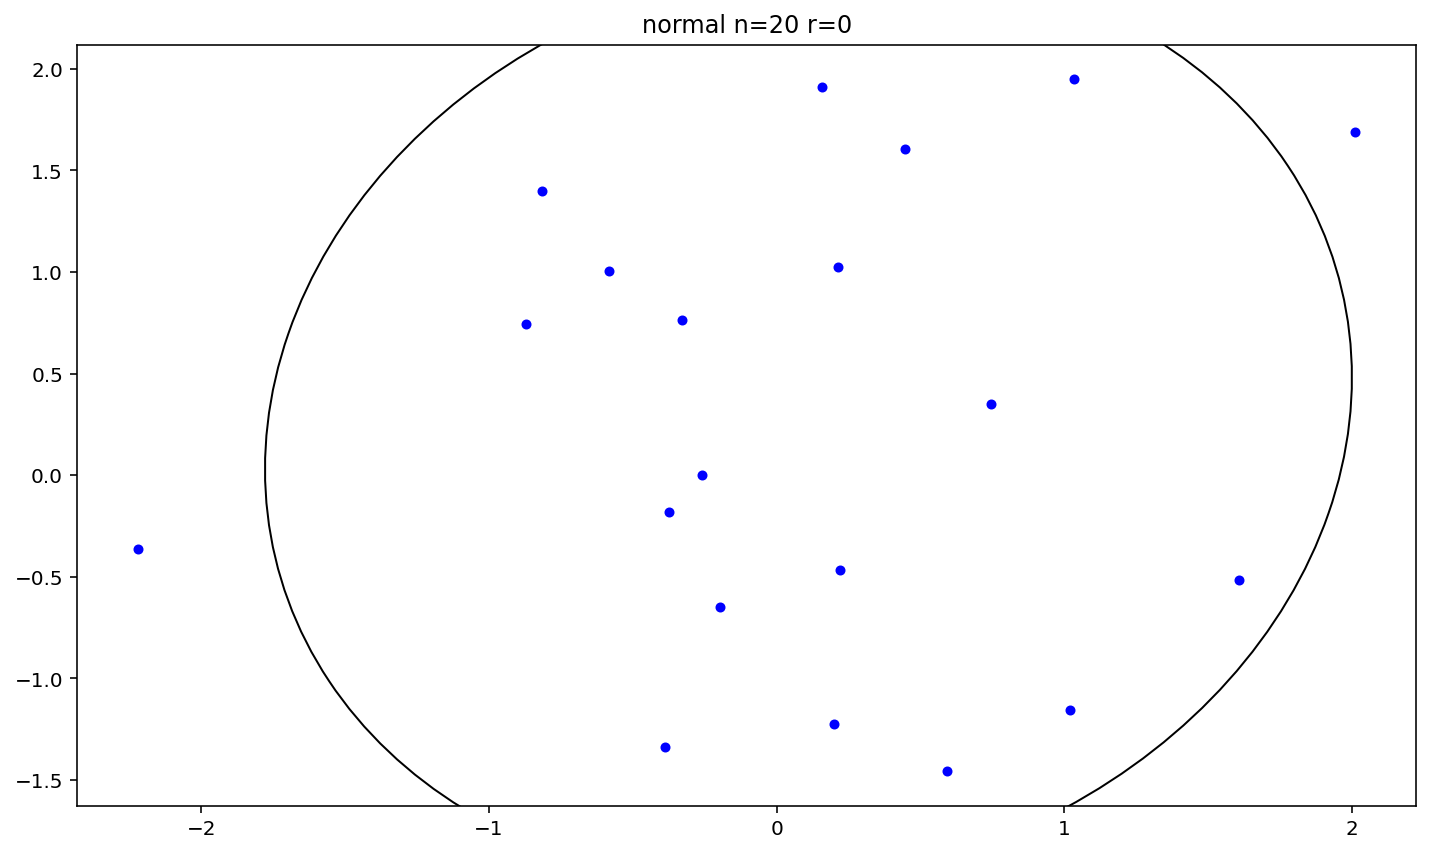

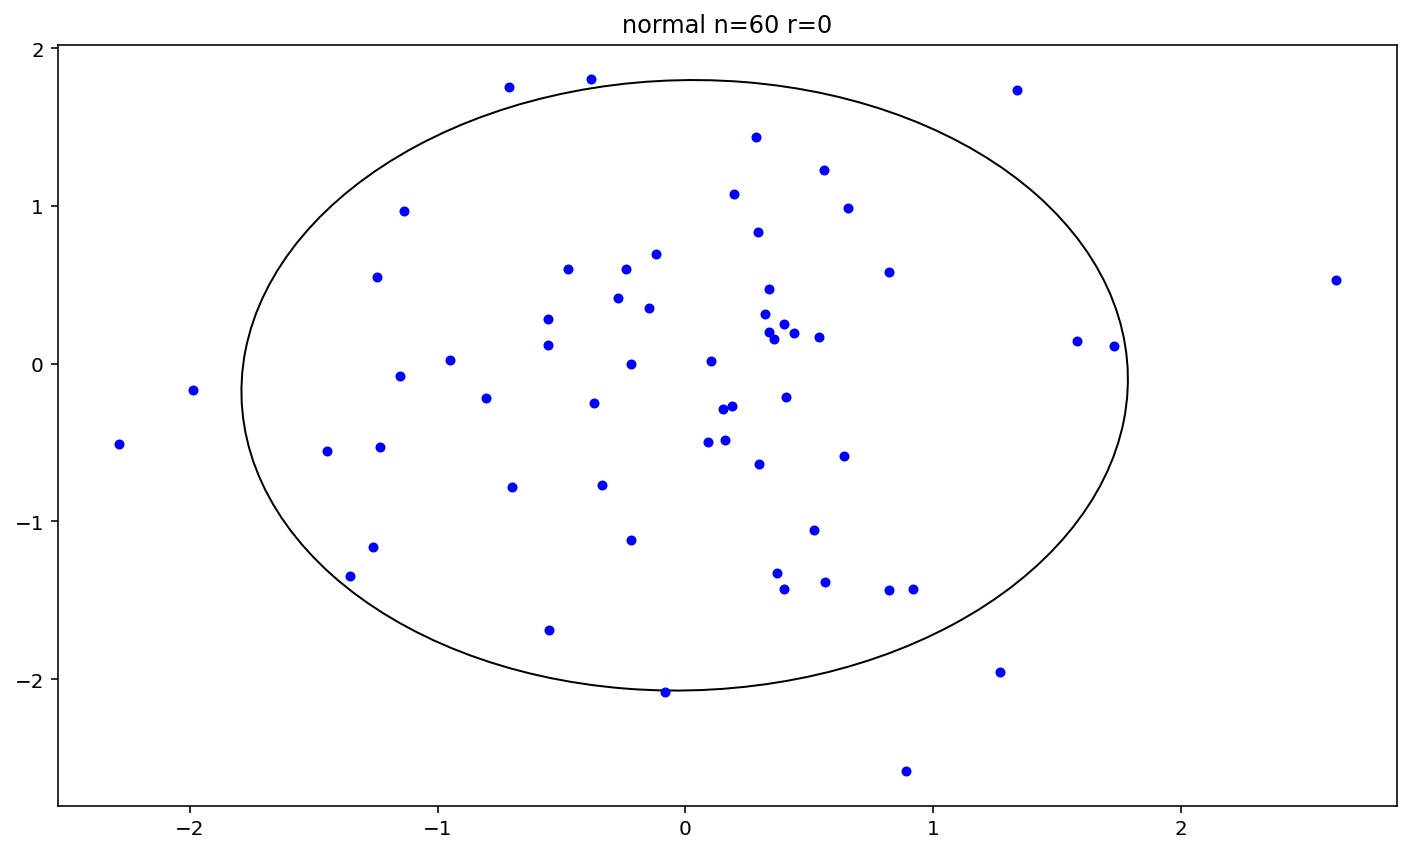

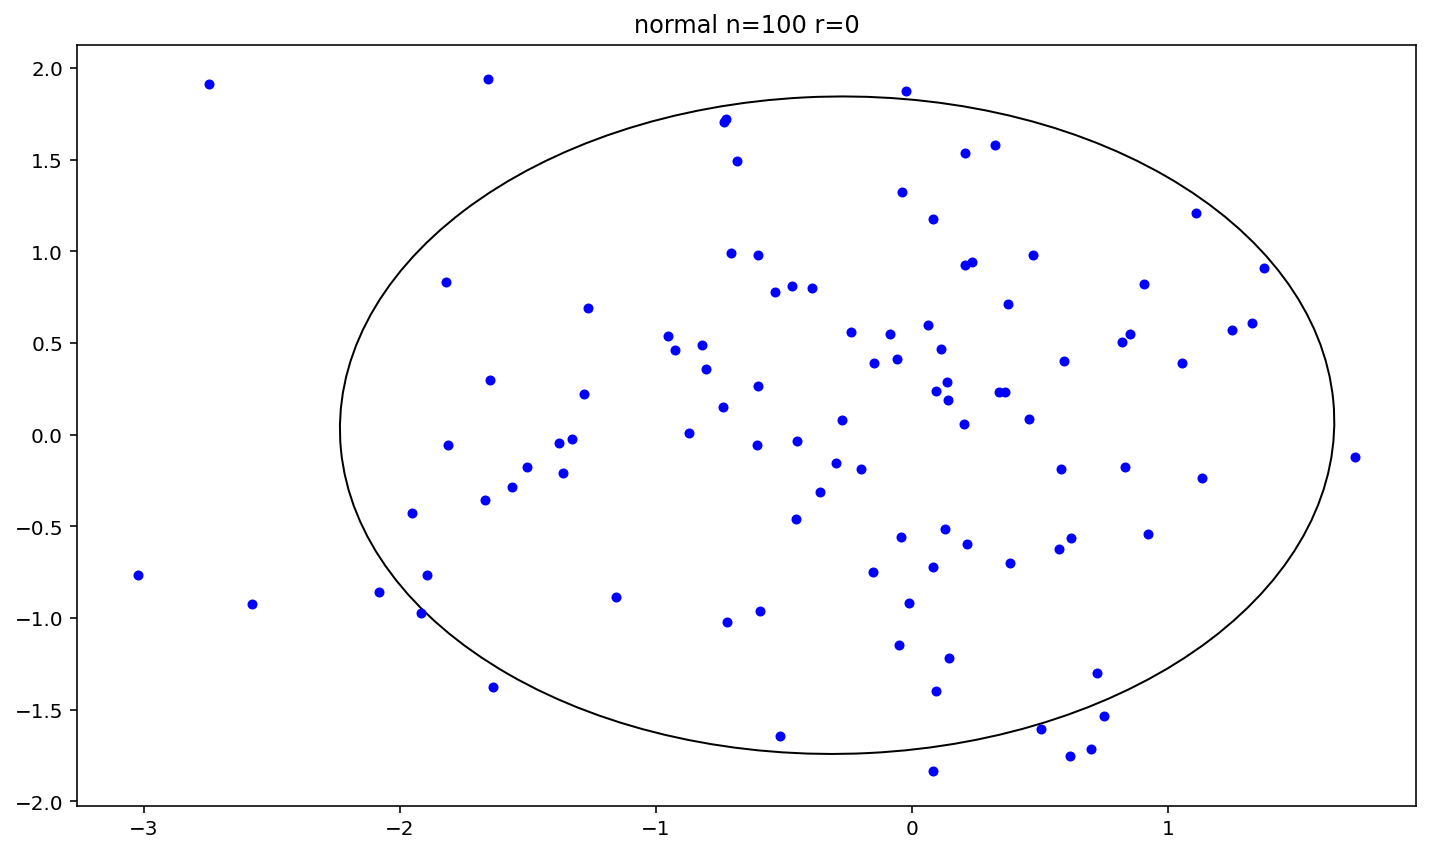

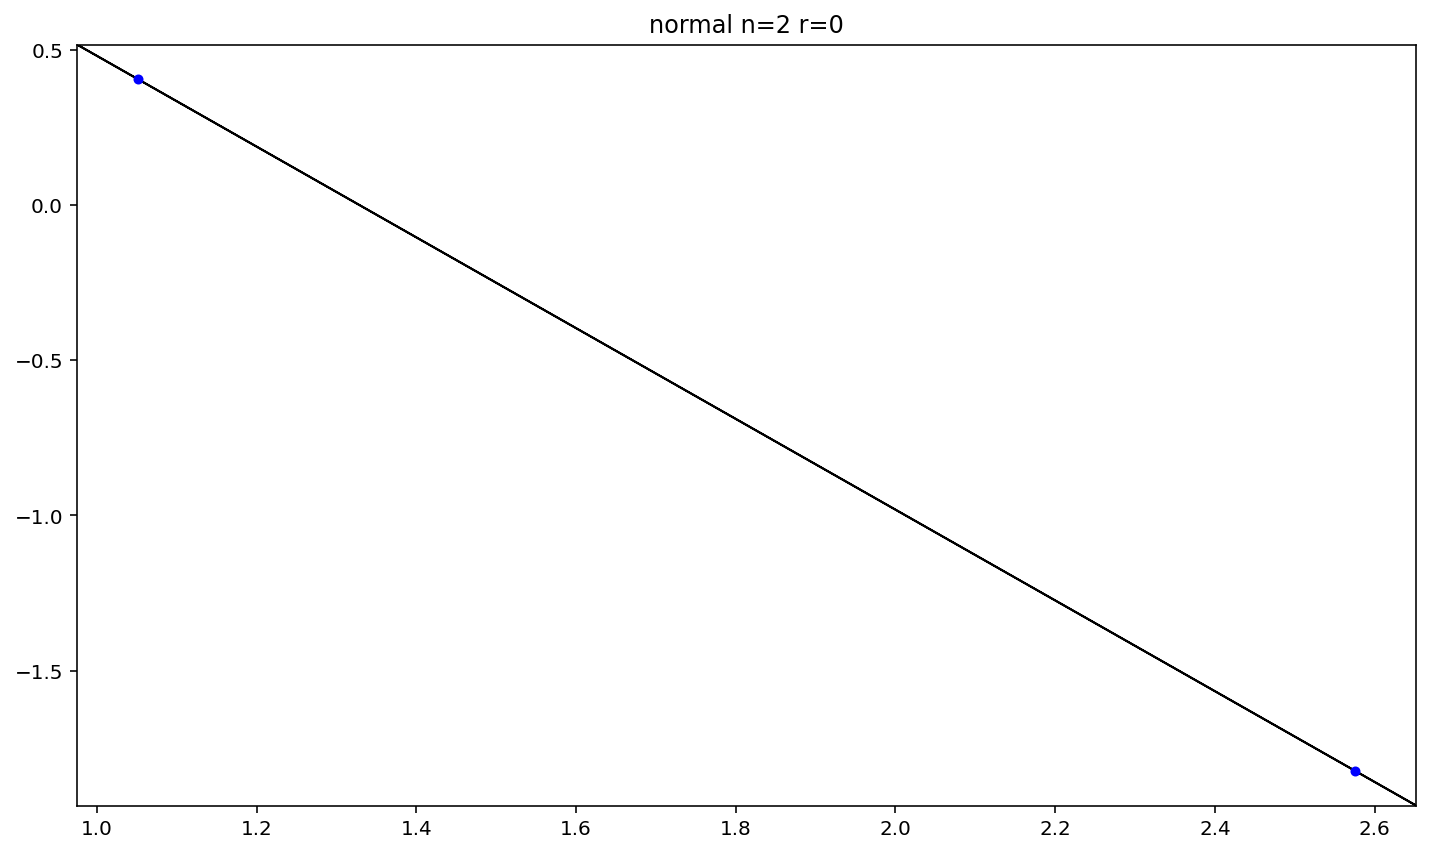

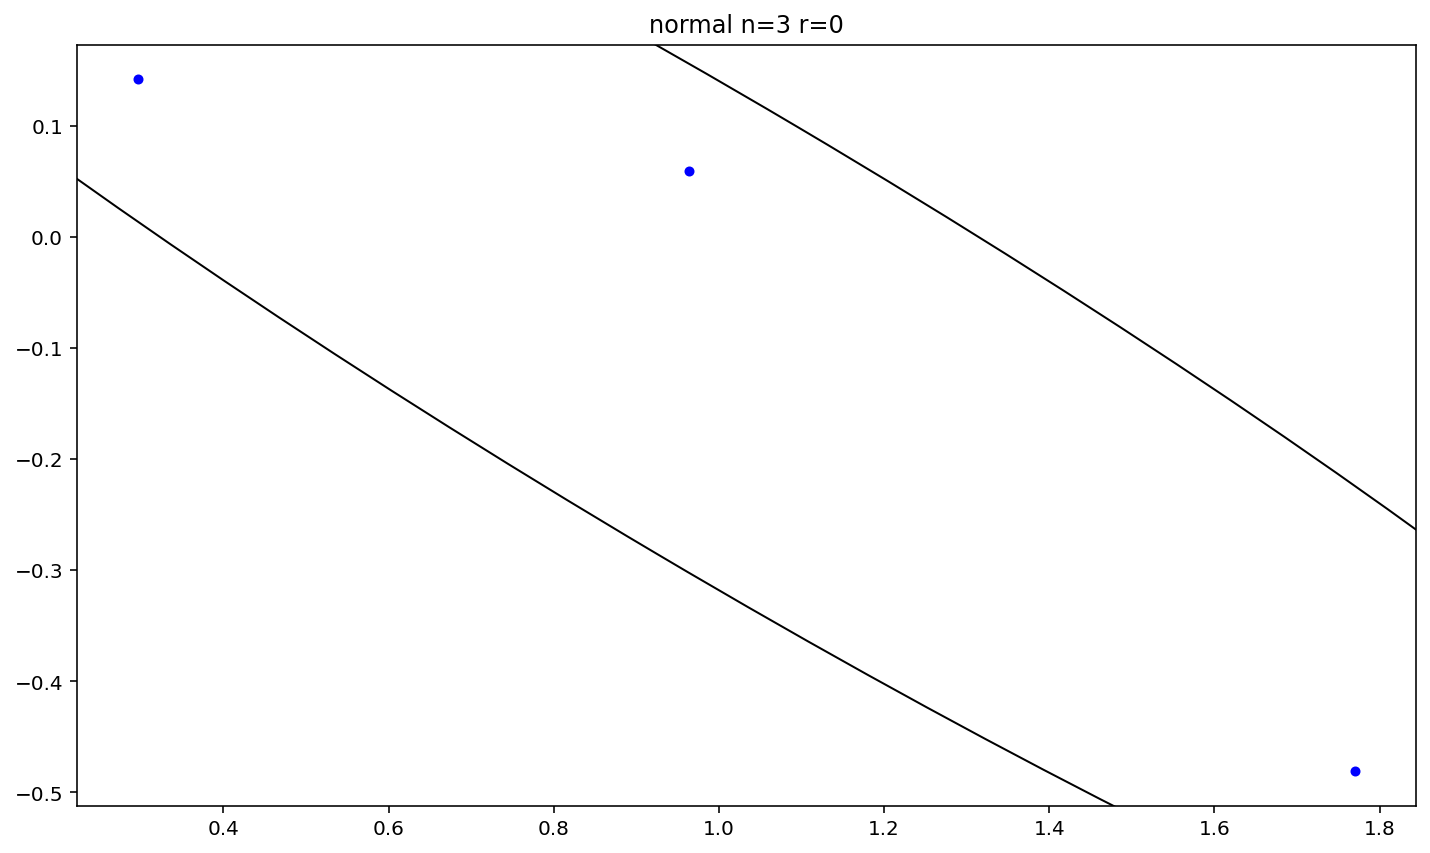

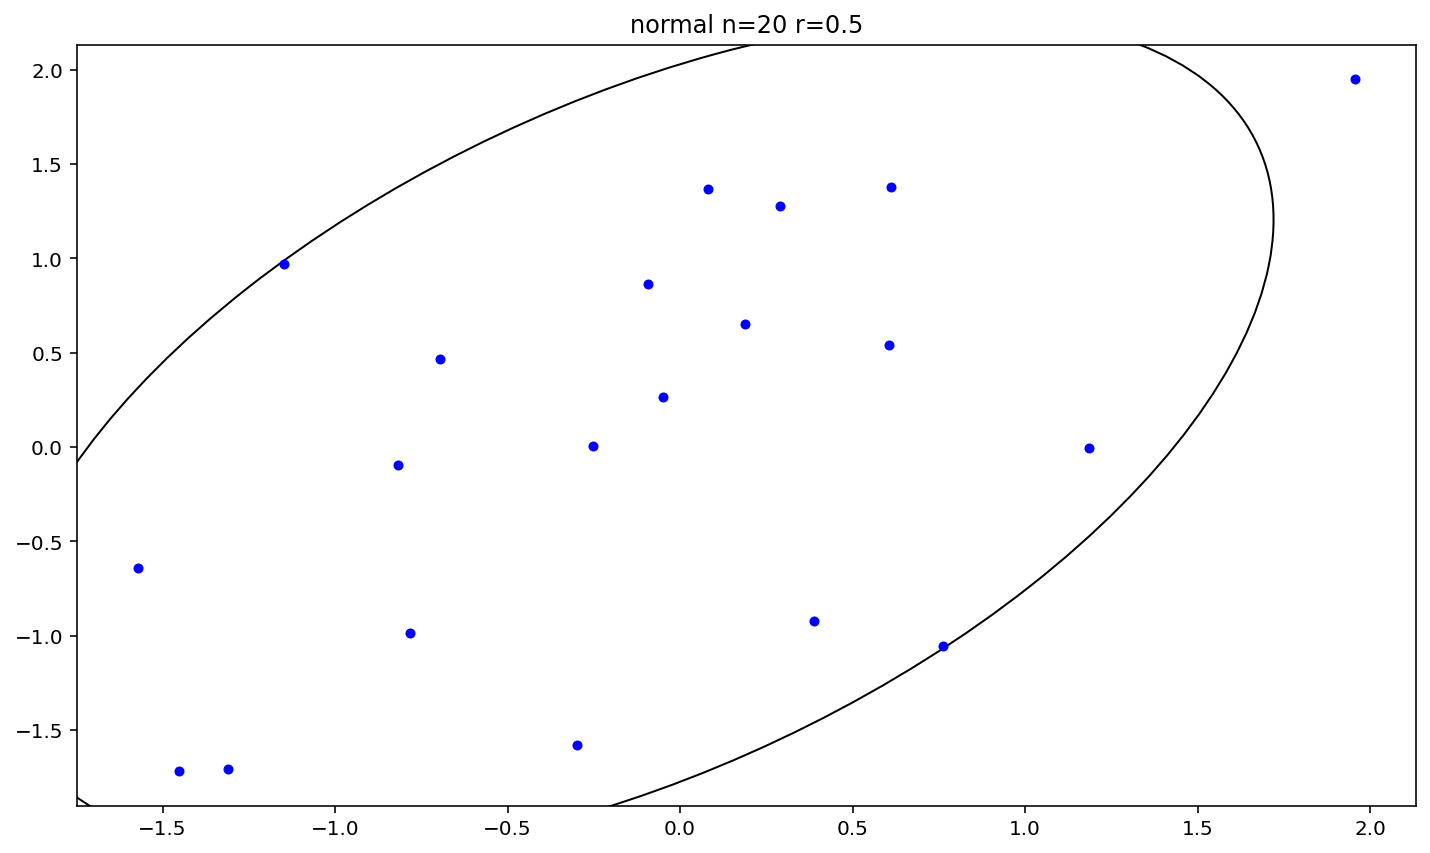

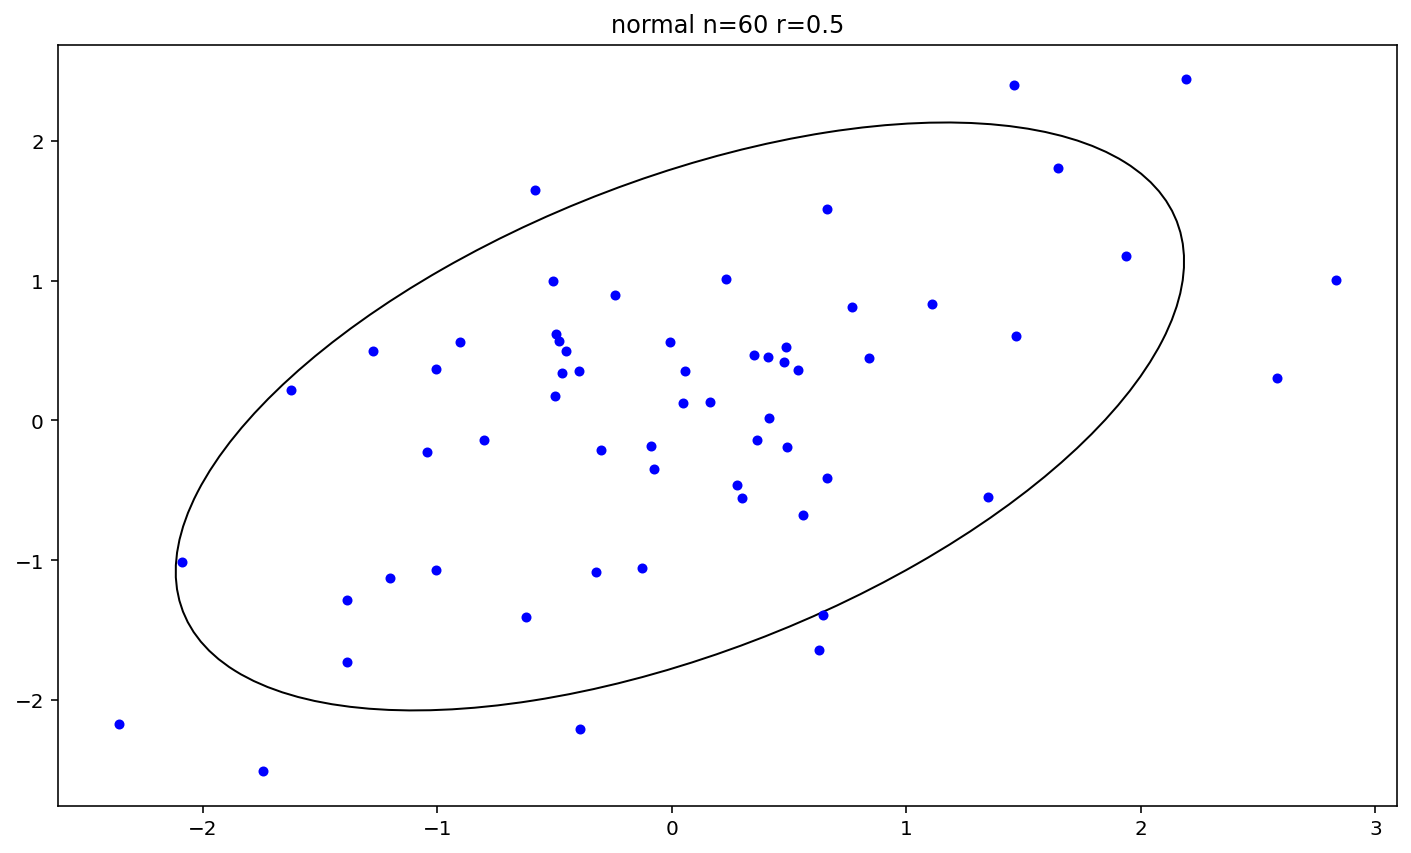

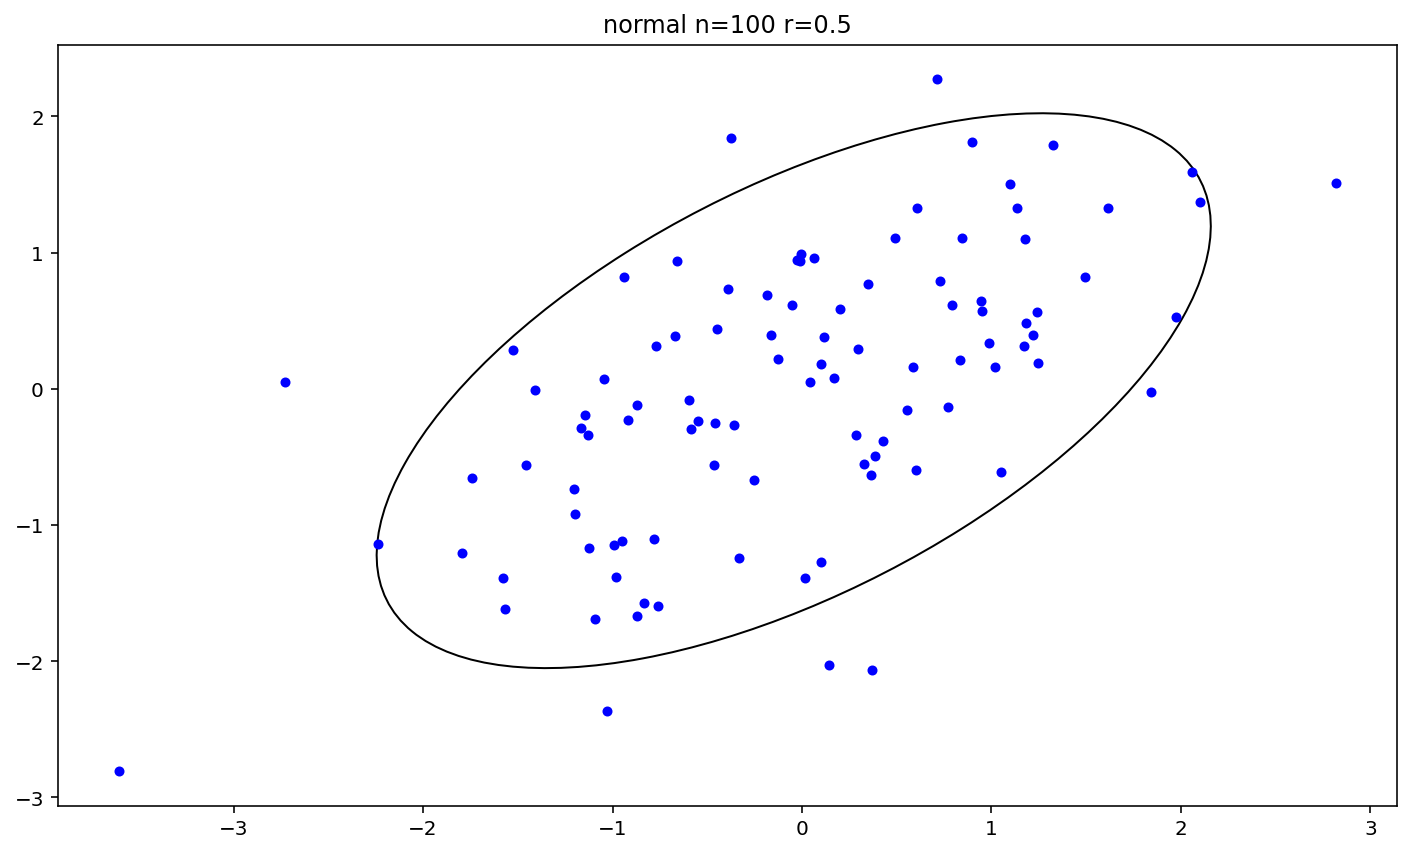

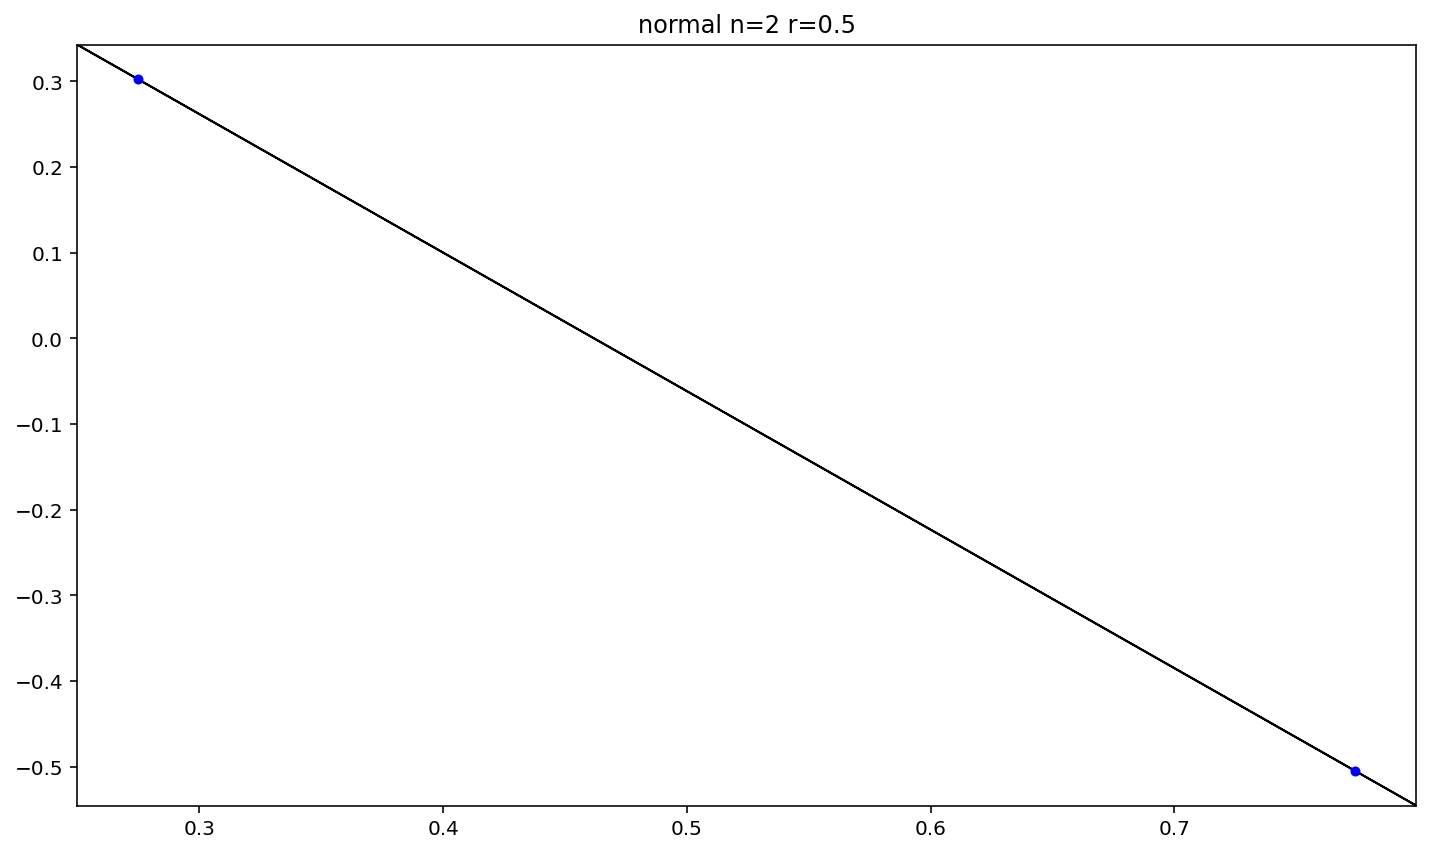

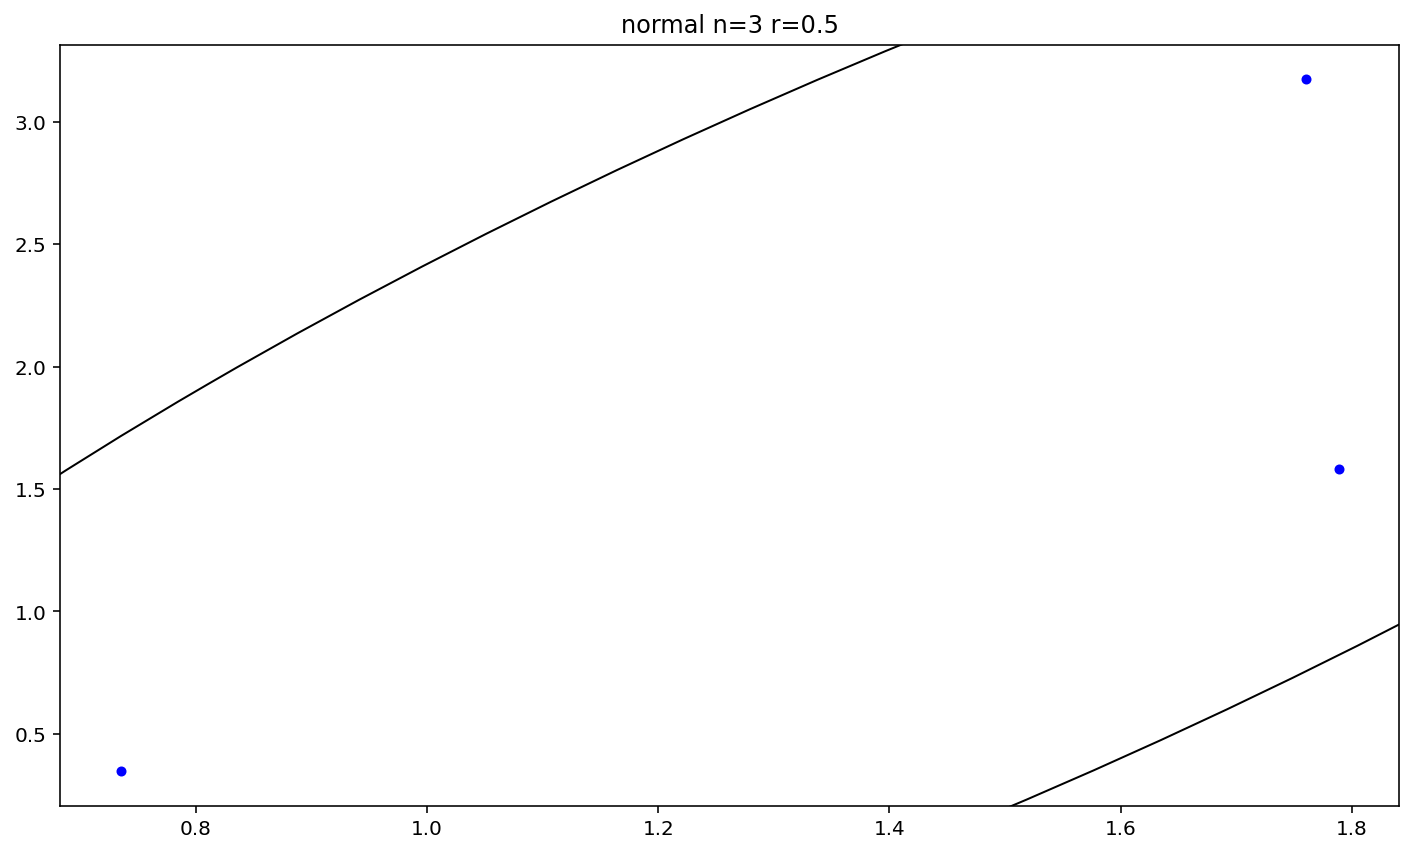

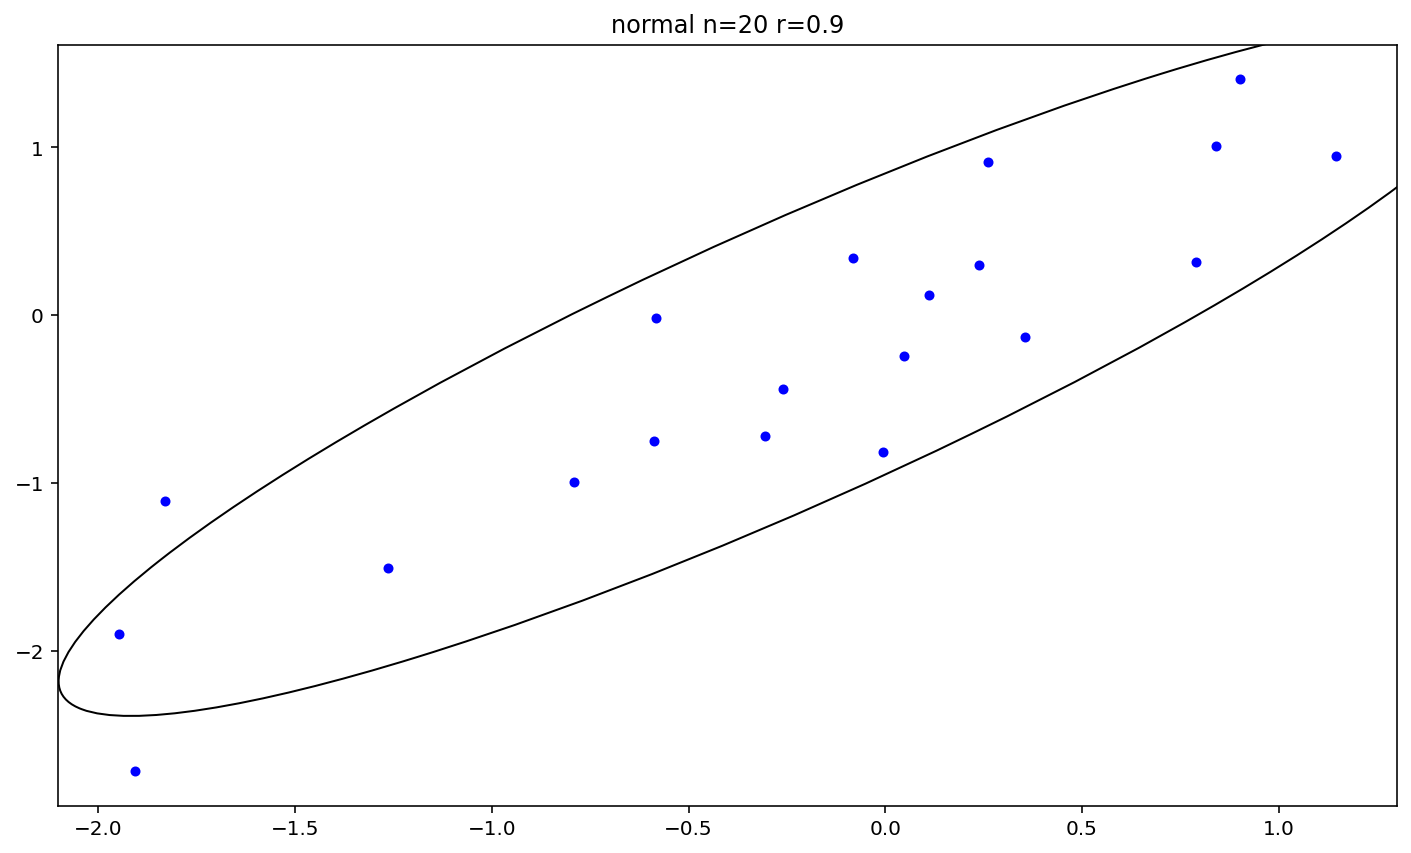

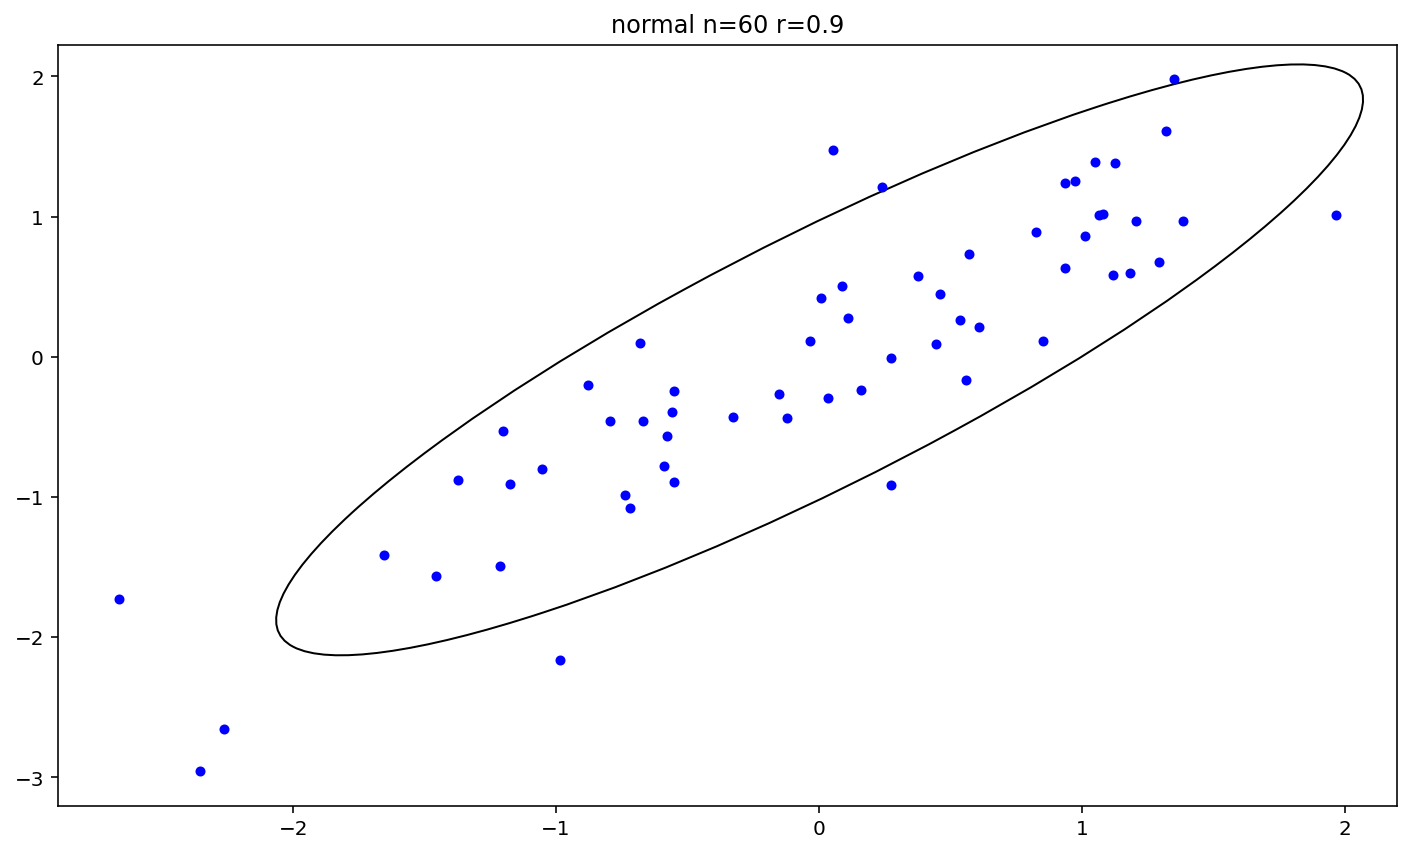

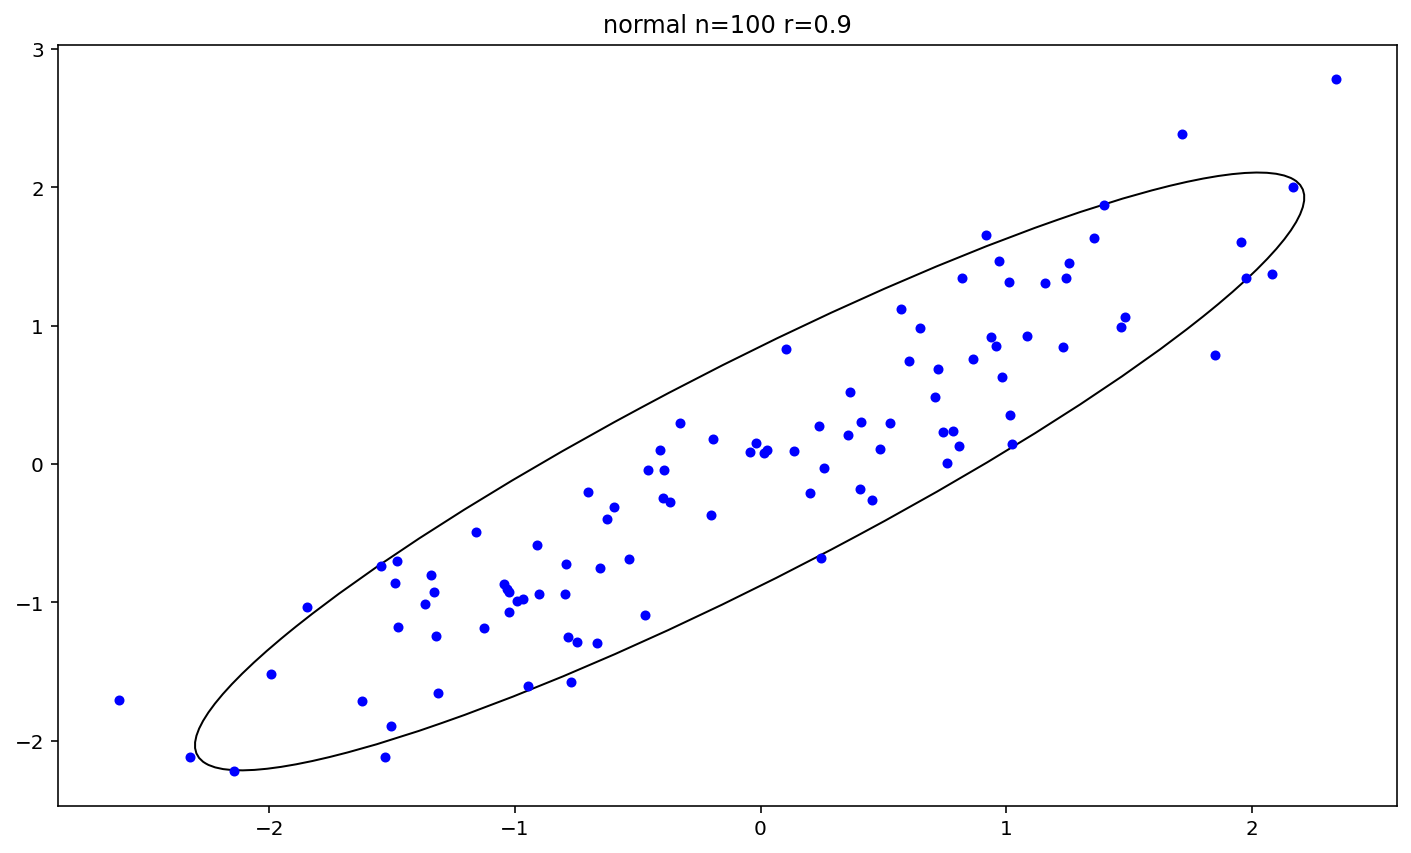

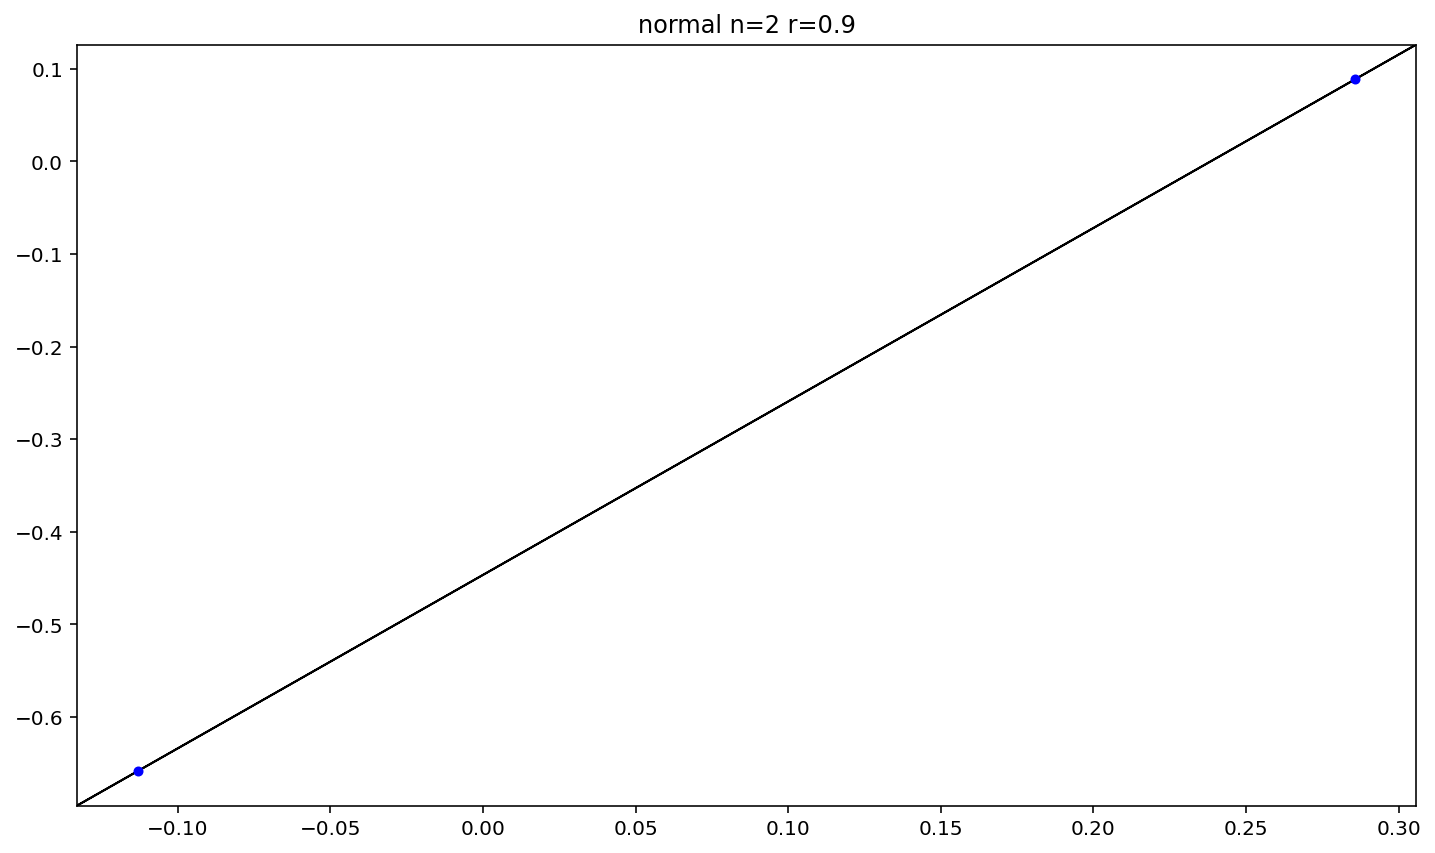

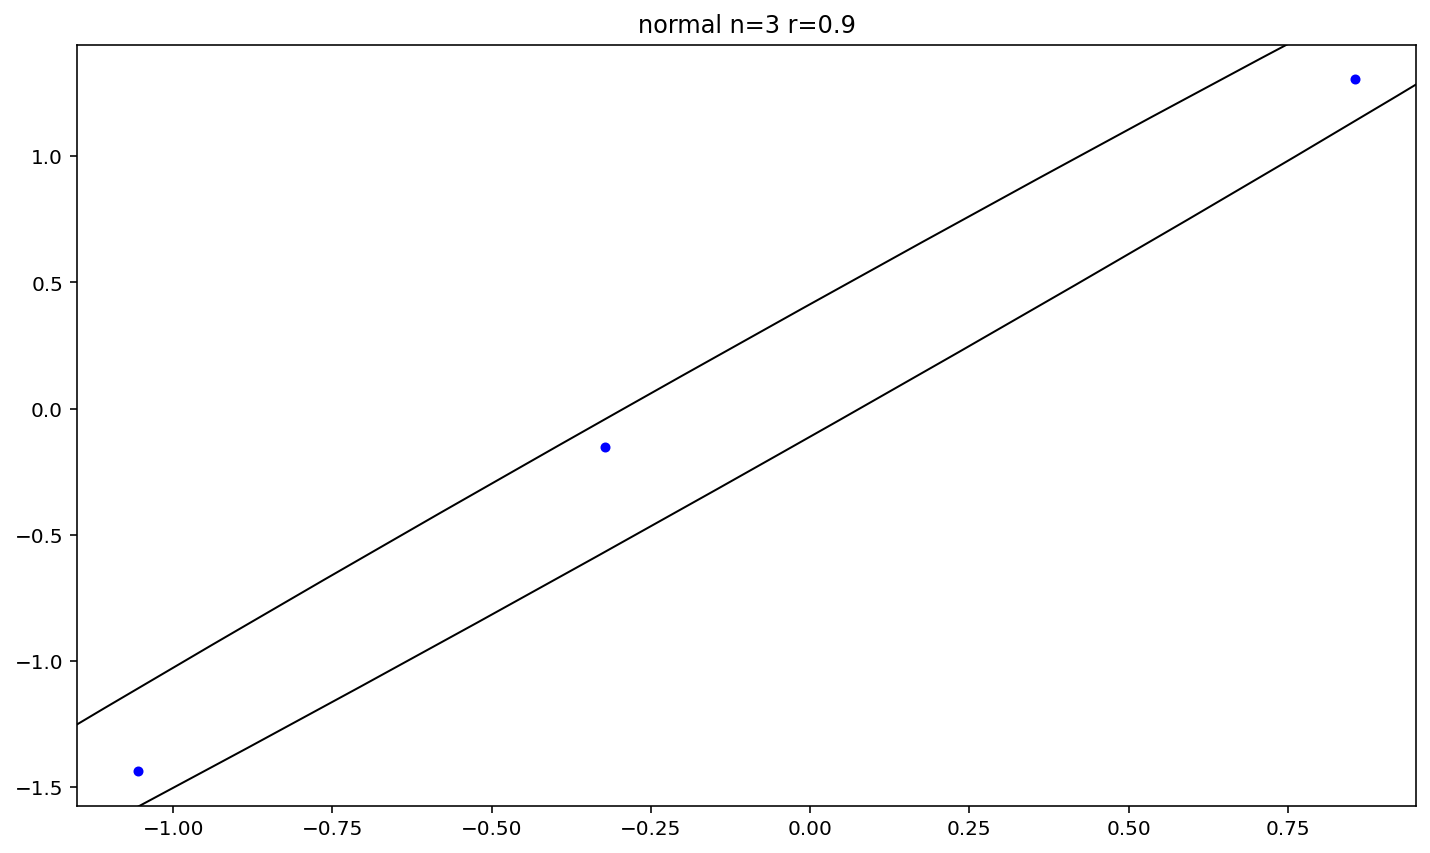

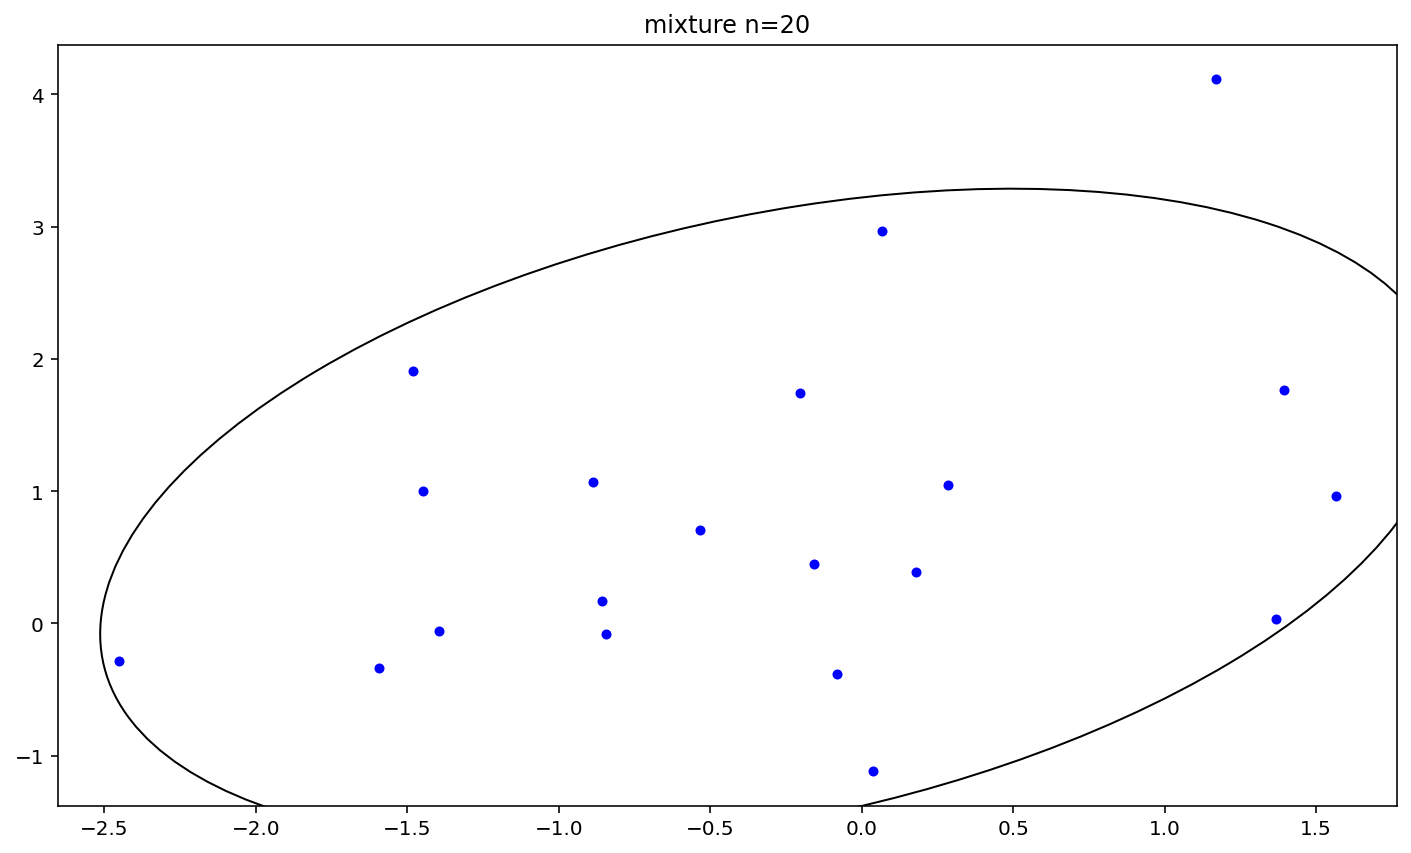

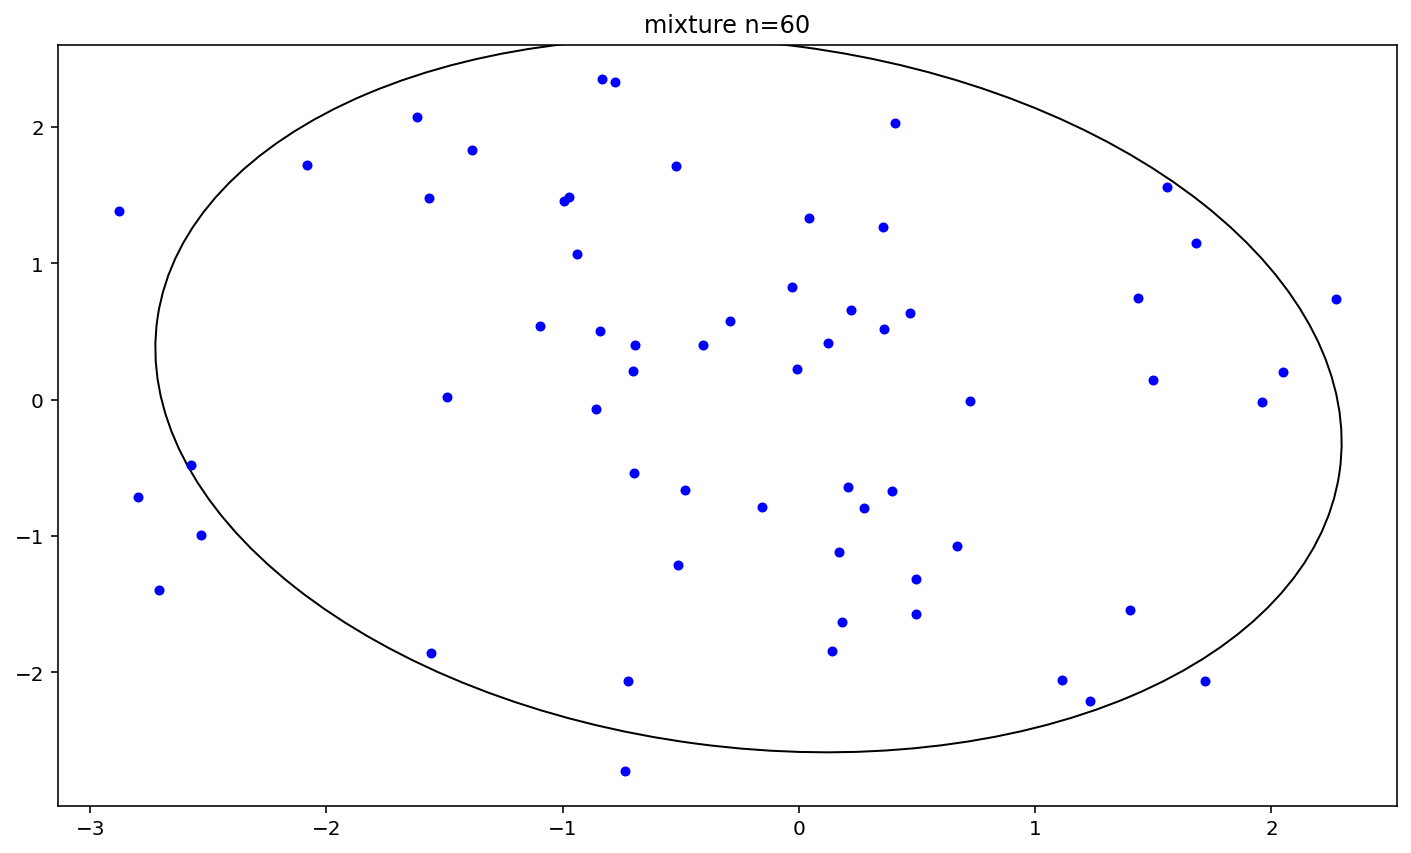

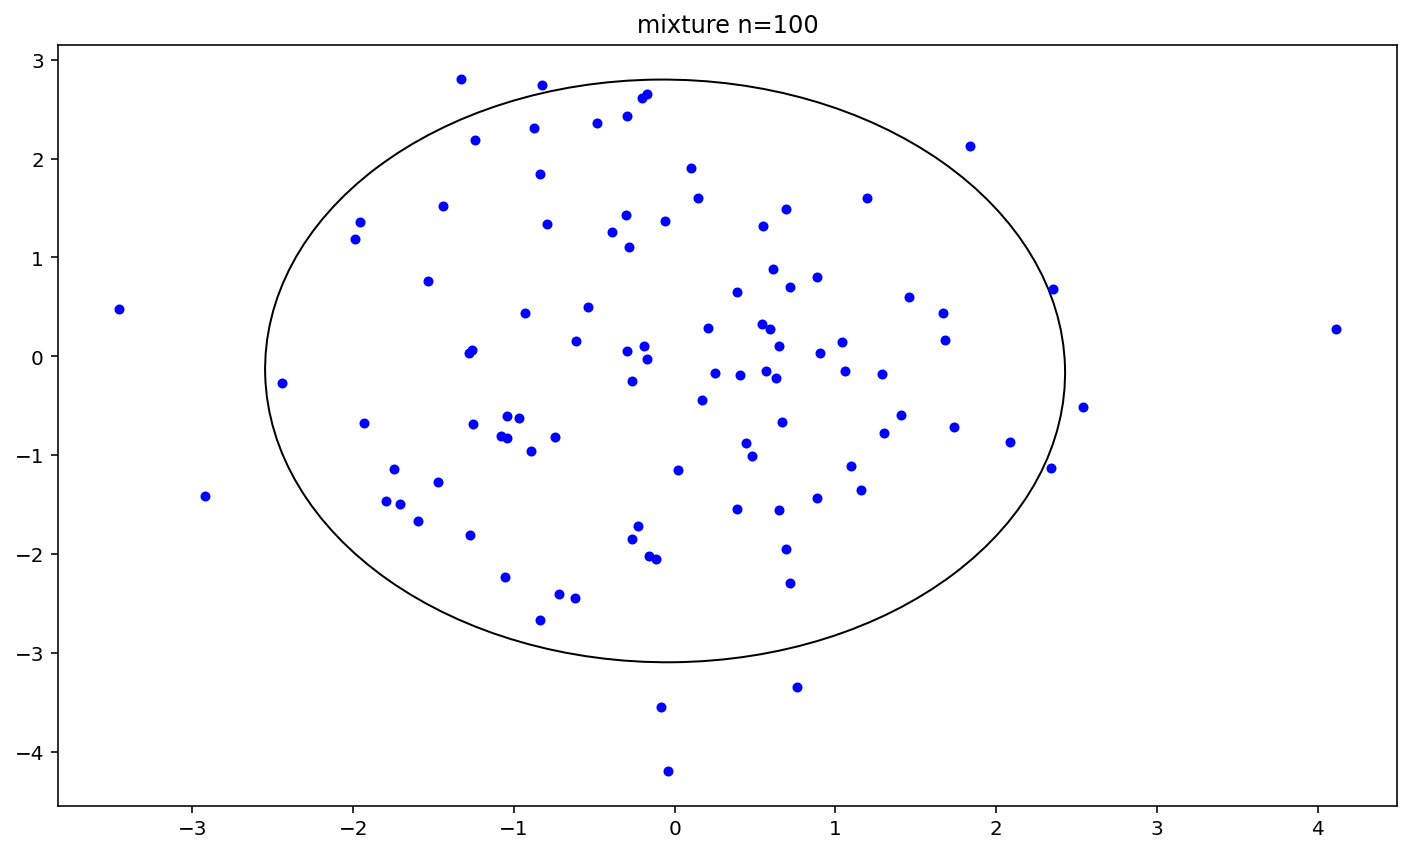

In [3]:
for r in correlation:
    if r != MIXTURE:
        print('r=' + str(r))
    else:
        print('mixture')
        
    for n in power:
        if r == MIXTURE and (n in [2, 3]):
            continue
        
        fig, ax = plt.subplots()
        coeffs = {
            'Pearson' : np.array([]),
            'Spearman' : np.array([]),
            'quadrant' : np.array([])
        }
        
        for i in range(REPEATS):
            if r != MIXTURE:
                N = norm_dist(r, n)
            else:
                N = mix_norm_dist(n)
                
            X = custom_copy(N, 0)
            Y = custom_copy(N, 1)
            
            coeffs['Pearson'] = np.append(coeffs['Pearson'], pearsonr(X, Y))
            coeffs['Spearman'] = np.append(coeffs['Spearman'], spearmanr(X, Y))
            coeffs['quadrant'] = np.append(coeffs['quadrant'], quadrant(X, Y))
        
        table = pd.DataFrame(
            np.array(
                [
                    [discard(E(z), 3) for z in [coeffs['Pearson'], coeffs['Spearman'], coeffs['quadrant']]],
                    [discard(E_2(z), 3) for z in [coeffs['Pearson'], coeffs['Spearman'], coeffs['quadrant']]],
                    [discard(D(z), 3) for z in [coeffs['Pearson'], coeffs['Spearman'], coeffs['quadrant']]]
                ],
            )
        )
        
        nstd = 2
        ax.plot(X, Y, 'bo', ms=4)
        cov = np.cov(X, Y)
        vals, vecs = eigsorted(cov)
        theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
        w, h = 2 * nstd * np.sqrt(vals)
        ell = Ellipse(xy = (np.mean(X), np.mean(Y)),
                      width = w, height = h,
                      angle = theta, color = 'black')
        ell.set_facecolor('none')
        
        if r != MIXTURE:
            ax.set_title('normal n=' + str(n) + ' r=' + str(r))
        else:
            ax.set_title('mixture n=' + str(n))
        
        ax.add_artist(ell)
        
        if r != MIXTURE:
            fig.savefig('normal_' + str(n) + '_0' + str(int(10 * r)))
        else:
            fig.savefig('mixture_' + str(n))
        
        table.index = ['E(z)', 'E(z^2)', 'D(z)']
        table.columns = coeffs.keys()
        table.columns.name = str('n=') + str(n)
        
        if n not in [2, 3]:
            display(table)